In [2]:
# Importing Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import scipy.stats as st





In [3]:

#Reading the data through CSV files
population_df  = pd.read_csv('Resources/clean_data.csv')
population_df

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression),Population
0,0.0,Afghanistan,AFG,1990.0,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,318435.8137,12412000.0
1,1.0,Afghanistan,AFG,1991.0,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,329044.7740,13299000.0
2,2.0,Afghanistan,AFG,1992.0,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,382544.5729,14486000.0
3,3.0,Afghanistan,AFG,1993.0,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,440381.5074,15817000.0
4,4.0,Afghanistan,AFG,1994.0,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,456916.6455,17076000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8179,NaN,Yemen,YEM,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29162000.0
8180,NaN,Zambia,ZMB,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17352000.0
8181,NaN,Zambia,ZMB,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17861000.0
8182,NaN,Zimbabwe,ZWE,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14439000.0


In [4]:
#renaming the column name,removing Null values from the data and changing the type back to integers.
population_df = population_df.rename(columns={'Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)': 'Prevalance-Depressive Disorders'})
population_df.dropna(axis = 0, how = 'any', inplace = True)
population_df['Year'] = population_df['Year'].astype(np.int64)
population_df['Population'] = population_df['Population'].astype(np.int64)

len(population_df["Entity"].unique())
population_df

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Prevalance-Depressive Disorders,Population
0,0.0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,318435.8137,12412000
1,1.0,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,329044.7740,13299000
2,2.0,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,382544.5729,14486000
3,3.0,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,440381.5074,15817000
4,4.0,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,456916.6455,17076000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,6463.0,Zimbabwe,ZWE,2013,0.155670,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641,303564.6036,13350000
6464,6464.0,Zimbabwe,ZWE,2014,0.155993,0.608610,0.118073,3.093964,0.768914,3.140290,1.515470,311665.7693,13587000
6465,6465.0,Zimbabwe,ZWE,2015,0.156465,0.609363,0.119470,3.098687,0.771802,3.155710,1.514751,320638.5072,13815000
6466,6466.0,Zimbabwe,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269,330437.3538,14030000


In [5]:
#clean_df = population_df.loc[ (population_df["Year"] == 2017),["Entity","Prevalance-Depressive Disorders","Population"]] 
clean_df = population_df.loc[ (population_df["Year"] >2012 ) & (population_df["Year"] <2018 ),["Entity","Prevalance-Depressive Disorders","Population"]] 
clean_df
list(clean_df.columns)

['Entity', 'Prevalance-Depressive Disorders', 'Population']

The correlation between both factors is 1.0


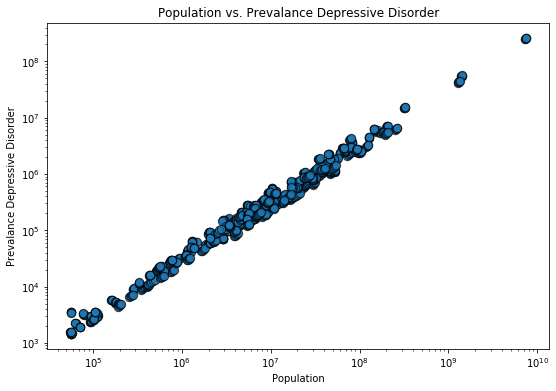

In [6]:
Entity_list = clean_df['Entity'].values.tolist()
Population_list = clean_df['Population'].values.tolist()
Prevalance_Depressive_list = clean_df['Prevalance-Depressive Disorders'].values.tolist()

fig, ax = plt.subplots(figsize = (9, 6))
ax.scatter(Population_list, Prevalance_Depressive_list, s=70, alpha=0.7, edgecolors="k")

# Set logarithmic scale on the both variables
ax.set_xscale("log")
ax.set_yscale("log")
plt.title("Population vs. Prevalance Depressive Disorder")
plt.xlabel('Population')
plt.ylabel('Prevalance Depressive Disorder')

correlation = st.pearsonr(Population_list,Prevalance_Depressive_list)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.show()

In [7]:
Prevalance_Population_df = clean_df.groupby(["Entity"],as_index=False).mean()[["Entity","Prevalance-Depressive Disorders","Population"]]
Prevalance_Population_df


,Entity,Prevalance-Depressive Disorders,Population
0,Afghanistan,9.085714e+05,3.434680e+07
1,Albania,6.922784e+04,2.892200e+06
2,Algeria,1.348311e+06,3.974640e+07
3,American Samoa,1.456955e+03,5.600000e+04
4,Andorra,3.218923e+03,7.840000e+04
...,...,...,...
191,Vietnam,2.736164e+06,9.267700e+07
192,World,2.564156e+08,7.379510e+09
193,Yemen,8.984694e+05,2.649420e+07
194,Zambia,3.991998e+05,1.588460e+07


In [22]:
top5_Prevalance_Depressive_Disorders=Prevalance_Population_df.sort_values('Prevalance-Depressive Disorders',ascending=False).head(6)
top5_Prevalance_Depressive_Disorders=top5_Prevalance_Depressive_Disorders[(top5_Prevalance_Depressive_Disorders.Entity != "World")]

top5_Prevalance_Depressive_Disorders

,Entity,Prevalance-Depressive Disorders,Population
37,China,5.541975e+07,1.406651e+09
79,India,4.370258e+07,1.309958e+09
185,United States,1.516619e+07,3.208106e+08
25,Brazil,7.078484e+06,2.044538e+08
80,Indonesia,6.402232e+06,2.583046e+08


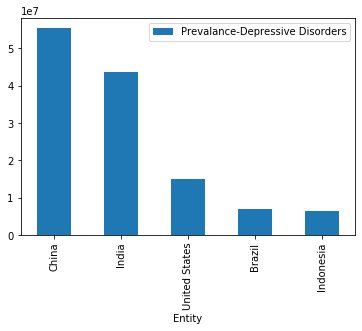

In [23]:
top5_Prevalance_Depressive_Disorders.plot(x="Entity",y=["Prevalance-Depressive Disorders"],kind="bar")

In [10]:
bottom5_Prevalance_Depressive_Disorders=Prevalance_Population_df.sort_values('Prevalance-Depressive Disorders').head(5)
bottom5_Prevalance_Depressive_Disorders

,Entity,Prevalance-Depressive Disorders,Population
3,American Samoa,1456.955063,56000.0
109,Marshall Islands,1461.249160,57400.0
128,Northern Mariana Islands,1576.768625,55800.0
50,Dominica,1912.188384,71000.0
20,Bermuda,2210.405317,63600.0


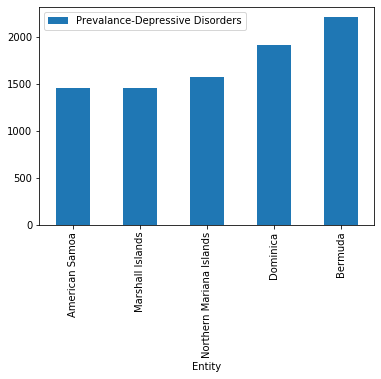

In [24]:
bottom5_Prevalance_Depressive_Disorders.plot(x="Entity",y=["Prevalance-Depressive Disorders"],kind="bar")